In [274]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import operator

In [275]:
train_file = "gene.train"
dev_file = "gene.key"
train_lines = []
with open(train_file) as f:
    train_lines = f.readlines()
    

dev_lines = []
with open(dev_file) as f:
    dev_lines = f.readlines()

In [276]:
word_tags = {}
word_dev_tags = {}

line_arr = [train_lines, dev_lines]
for i in range(len(line_arr)):
    if i == 0:
        tags = word_tags
    else:
        print(i)
        tags = word_dev_tags
        
    for line in line_arr[i]:
        items  = line.split()
        if not len(items)==2: continue
        #print(items)
        if items[1] not in tags: 
            tags[items[1]] =0
        tags[items[1]] +=1
    
print(len(word_tags), len(word_dev_tags))

1
2 2


In [277]:
labels = []
counts_train = []
counts_dev = []
for tag in word_tags.keys():
    labels.append(tag)
    
for tag in labels:
    counts_train.append(word_tags[tag])
    counts_dev.append(word_dev_tags[tag])
    
print(labels)
print(counts_train)
print(counts_dev)

['O', 'I-GENE']
[345128, 41072]
[13193, 1527]


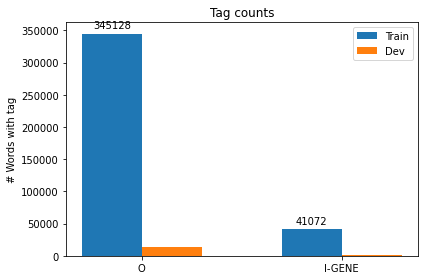

In [278]:

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts_train, width, label='Train')
rects2 = ax.bar(x + width/2, counts_dev, width, label='Dev')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# Words with tag')
ax.set_title('Tag counts')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()



In [279]:
counts_file = "gene.counts"
words = {}
ngrams = {1 : {}, 2 : {}, 3 : {}}
word_counts = {}
for l in open(counts_file):
    t = l.strip().split()
    count = int(t[0])
    key = tuple(t[2:])
    if t[1] == "1-GRAM": ngrams[1][key[0]] = count
    elif t[1] == "2-GRAM": ngrams[2][key] = count
    elif t[1] == "3-GRAM": ngrams[3][key] = count
    elif t[1] == "WORDTAG":
        words[key] = count
        word_counts.setdefault(key[1], 0)
        word_counts[key[1]] += count

In [280]:
i =0
for key in ngrams[1]:
    print(key, ngrams[1][key])

O 345128
I-GENE 41072


In [281]:
i =0
for key in ngrams[2]:
    print(key, ngrams[2][key])
    i+=1
    if i> 20:
        break

('*', 'O') 13047
('*', '*') 13796
('O', 'O') 315457
('O', 'I-GENE') 15888
('I-GENE', 'I-GENE') 24435
('I-GENE', 'O') 16624
('I-GENE', 'STOP') 13
('O', 'STOP') 13783
('*', 'I-GENE') 749


In [282]:
i =0
for key in ngrams[3]:
    print(key, ngrams[3][key])
    i+=1
    if i> 20:
        break

('*', '*', 'O') 13047
('*', 'O', 'O') 12451
('O', 'O', 'I-GENE') 11804
('O', 'I-GENE', 'I-GENE') 9181
('I-GENE', 'I-GENE', 'O') 9622
('I-GENE', 'O', 'I-GENE') 3491
('I-GENE', 'I-GENE', 'I-GENE') 14802
('I-GENE', 'I-GENE', 'STOP') 11
('O', 'O', 'O') 291686
('O', 'O', 'STOP') 11967
('I-GENE', 'O', 'O') 11320
('O', 'I-GENE', 'O') 6706
('*', '*', 'I-GENE') 749
('*', 'I-GENE', 'I-GENE') 452
('I-GENE', 'O', 'STOP') 1813
('*', 'I-GENE', 'O') 296
('*', 'O', 'I-GENE') 593
('*', 'O', 'STOP') 3
('*', 'I-GENE', 'STOP') 1
('O', 'I-GENE', 'STOP') 1


In [283]:
i =0
for key in word_counts:
    print(key, word_counts[key])
    i+=1
    if i> 20:
        break

Comparison 40
with 3367
alkaline 29
phosphatases 11
and 9980
5 981
- 13150
_RARE_ 13471
_ic_ 1311
aspects 16
of 14771
neonatal 11
hyperbilirubinemia 5
. 15509
When 63
CSF 65
[ 136
HCO3 7
is 2348
shown 174
as 1263


In [284]:
from count_freqs import *

In [285]:
inp = open(train_file,"r")
sentence_itr = sentence_iterator(simple_conll_corpus_iterator(inp))

In [286]:
word_freqs = {}
for sent in sentence_itr:
    for word, _ in sent:
        if word not in word_freqs:
            word_freqs[word] = 0
        word_freqs[word] += 1

In [287]:
rare_cutoff = 5
rare_words = {}
for w in word_freqs:
    if word_freqs[w] < rare_cutoff:
        rare_words[w] = word_freqs[w]

In [288]:
pn = 0
abbr = 0
num = 0
for w in rare_words:
    if w.isupper():
        abbr += 1
    elif w[0].isupper():
        pn += 1
    elif w.isdecimal():
        num += 1

print(abbr)
print(pn)
print(num)

4788
5941
777


In [331]:
common_3suffixes = {}
common_2suffixes = {}
for w in rare_words:
    if len(w) >= 3:
        suffix2 = w[-2:]
        suffix3 = w[-3:]
        if suffix2 not in common_2suffixes:
            common_2suffixes[suffix2] = 0
        if suffix3 not in common_3suffixes:
            common_3suffixes[suffix3] = 0
        common_2suffixes[suffix2] += 1
        common_3suffixes[suffix3] += 1

three_suffixes = common_3suffixes.keys()
delete_suf = []
for suffix in three_suffixes:
    if common_3suffixes[suffix] < 30:
        delete_suf.append(suffix)
for suf in delete_suf:
    del common_3suffixes[suf]

three_suffixes = common_3suffixes.keys()
two_in_three_suff = set([x[-2:] for x in three_suffixes])
delete_suff = []
for s in common_2suffixes:
    if s in two_in_three_suff:
        delete_suff.append(s)

for suf in common_2suffixes:
    if common_2suffixes[suf] < 30 and suf not in delete_suff:
        delete_suff.append(suf)
# print(delete_suff)
for suf in delete_suff:
    del common_2suffixes[suf]


In [332]:
suffixes_dict = {}
for s in common_2suffixes:
    suffixes_dict[s] = True
for s in common_3suffixes:
    suffixes_dict[s] = True

In [333]:
len(suffixes_dict)

157

In [334]:
rare_words_file = "rare_words.txt"
with open(rare_words_file, "w") as wf:
    for suffix in suffixes_dict:
        wf.writelines(suffix + "\n")


In [335]:
rare_words_file = "rare_words.txt"
suffixes_read = {}
with open(rare_words_file, "r") as rf:
    lines = rf.readlines()
    for l in lines:
        suffixes_read[l[:-1]] = True

In [336]:
len(suffixes_read)

157